# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: This dataset is meant for researchers and marketers to analyze product-customer pipeline

What: this is a dataset containing metrics from campaigns, sales and customer churn related to the events happening with the products.

How: With the help of customer ID and campaign ID we can assign sales and results to particular trends with the data. We can predict umpcoming trends on similar campaigns or estimate how new trends can or cannot be designed through the data.

# 3. Homework - work with your own data

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [12]:
df_digital = pd.read_csv("marketing_and_product_performance.csv")
df_digital.head()


,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [13]:
df_digital.info()
df_digital.iloc[0:5]

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  str    
 1   Product_ID                         10000 non-null  str    
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  str    
 8   Subscription_Tier                  10000 non-null  str    
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  str    
 11  Discount_Level                     10000 non-null  int64  
 12  Un

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [14]:
df_digital.describe()


,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [15]:
df_digital.isna().sum()


Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [16]:
category_summary = df_digital.groupby("Product_ID").agg(
    avg_budget=("Budget", "mean"),
    avg_roi=("ROI", "mean"),
    total_revenue=("Revenue_Generated", "sum"),
    avg_satisfaction=("Customer_Satisfaction_Post_Refund", "mean")
)
category_summary


,avg_budget,avg_roi,total_revenue,avg_satisfaction
Product_ID,,,,
PROD_008GPL,48155.17,1.46,40755.80,4.0
PROD_008LNA,31893.36,2.82,29029.17,4.0
PROD_008NUJ,34608.14,3.99,78669.44,1.0
PROD_00ABIO,23663.50,1.88,60442.33,1.0
PROD_00N28V,39992.26,2.77,99774.36,4.0
...,...,...,...,...
PROD_ZZA5DD,30913.36,1.37,71373.80,2.0
PROD_ZZAQWV,10752.46,0.71,51020.82,2.0
PROD_ZZFZ7G,2258.01,1.57,32826.21,1.0


In [17]:
#Conversion Metrics
df_digital["CTR"] = df_digital["Clicks"] / df_digital["Budget"]
df_digital["Conversion_Rate"] = df_digital["Conversions"] / df_digital["Clicks"]
df_digital["Revenue_per_Conversion"] = (
    df_digital["Revenue_Generated"] / df_digital["Conversions"]
)
#Sales Efficiency
df_digital["Revenue_per_Dollar"] = (
    df_digital["Revenue_Generated"] / df_digital["Budget"]
)

# Discount
df_digital["Discount_per_Unit"] = (
    df_digital["Discount_Level"] / df_digital["Units_Sold"]
)

In [18]:
drop_cols = [
    "Product_ID",
    "Category_ID",
    "Campaign_ID",
    "Customer_ID",
    "Flash_Sale_ID",
    "Bundle_ID",
    "Budget",
    "Clicks",
    "Conversions"
]

df_model = df_digital.drop(columns=drop_cols, errors="ignore")
df_model.columns


Index(['Revenue_Generated', 'ROI', 'Subscription_Tier', 'Subscription_Length',
       'Discount_Level', 'Units_Sold', 'Bundle_Price',
       'Customer_Satisfaction_Post_Refund', 'Common_Keywords', 'CTR',
       'Conversion_Rate', 'Revenue_per_Conversion', 'Revenue_per_Dollar',
       'Discount_per_Unit'],
      dtype='str')

In [19]:
df_model = pd.get_dummies(
    df_model,
    columns=["Subscription_Tier", "Common_Keywords"],
    drop_first=True
)
df_model.head()

,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund,CTR,Conversion_Rate,Revenue_per_Conversion,Revenue_per_Dollar,Discount_per_Unit,Subscription_Tier_Premium,Subscription_Tier_Standard,Common_Keywords_Durable,Common_Keywords_Innovative,Common_Keywords_Stylish
0,15520.09,1.94,4,43,34,433.80,4,0.118409,0.014759,212.603973,0.371557,1.264706,True,False,False,False,False
1,30866.17,0.76,4,28,97,289.29,2,0.019063,0.894737,60.521902,1.032281,0.288660,True,False,False,True,False
2,32585.62,1.41,9,51,160,462.87,4,0.158534,0.074732,122.964604,1.456832,0.318750,False,False,False,False,False
3,95740.12,3.32,32,36,159,334.16,1,0.085888,0.303537,122.586581,3.195861,0.226415,True,False,True,False,False
4,81990.43,3.53,29,20,52,371.67,2,0.022549,0.096577,1037.853544,2.260110,0.384615,False,True,False,False,False


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

1) The data is fully clean, no NA's, no irregularities within the columns, they all make sense.

2) The data does not have to be touched, however before encoding I have decided to feature engineer some columns to make more sense out of them.

3) All categories have 10000 variables exactly without any NA's. It is a really good dataset honestly.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

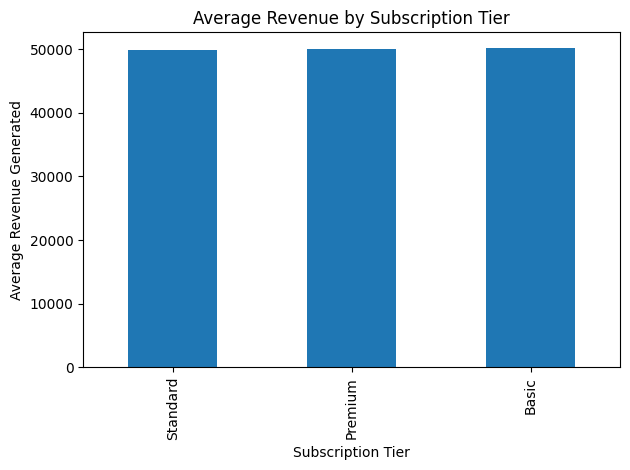

In [20]:
rev_by_tier = (
    df_digital
    .groupby("Subscription_Tier")["Revenue_Generated"]
    .mean()
    .sort_values()
)
plt.figure()
rev_by_tier.plot(kind="bar")
plt.ylabel("Average Revenue Generated")
plt.xlabel("Subscription Tier")
plt.title("Average Revenue by Subscription Tier")
plt.tight_layout()
plt.show()

Subscription tier is NOT a significant feature in determining revenue generation. 